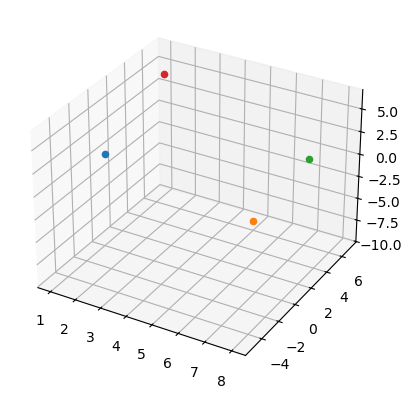

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")
ax.scatter(3, -5, 6)
ax.scatter(5, 6, -9)
ax.scatter(8, 3, 3)
ax.scatter(1, 7, 4)
plt.show()



In [11]:
Z = np.zeros((5,5))
Z += np.arange(5)
print(Z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

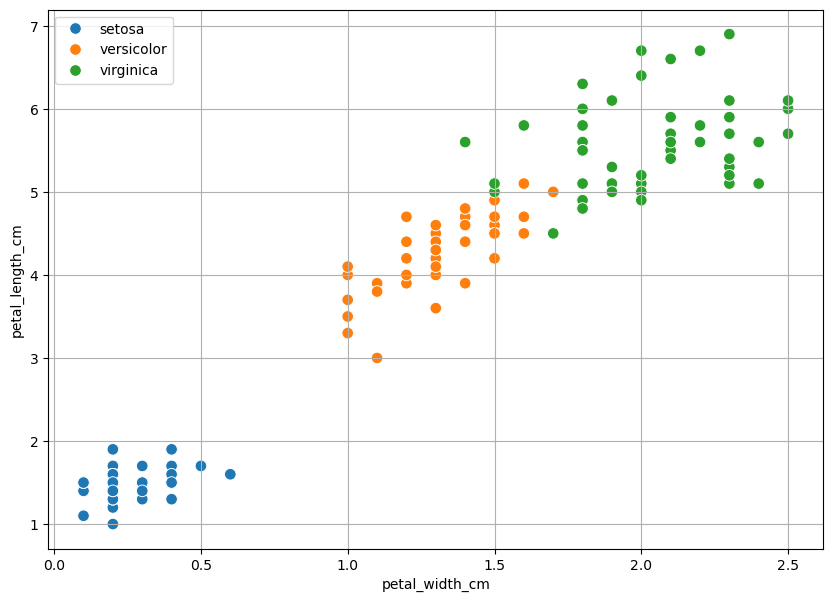

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/akmand/datasets/master/iris.csv')

x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.iloc[:,-1],test_size=0.20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

plt.figure(figsize=(10,7))
sns.scatterplot(x="petal_width_cm", y = "petal_length_cm",data = iris, hue="species",s=70)
plt.legend(loc=2)
plt.grid()
for i in range(len(y_test)):
    if np.array(y_test) != y_pred[i]:
        plt.scatter(x_test.iloc[i,3],x_test.iloc[i,2],color="red",s=150)
